In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def standardize(col_dat):
#     col_dat = col_dat.dropna()
    std_col = ( col_dat - np.mean(col_dat) )/ np.std(col_dat)
    return std_col


Bad key "text.kerning_factor" on line 4 in
/home/twgoo/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [410]:
# data = pd.read_csv('/data/member/twgoo/COVID-19/trajectory_analysis/oxford_globa.csv', index_col=0)
data = pd.read_csv('/data/member/twgoo/COVID-19/trajectory_analysis/data_additive_measure_rev.csv')

pre_country_code = set(data['CountryCode'])
print("Total number of countries :",len(pre_country_code))

std_data = data.iloc[:,1:-4].apply(lambda x : standardize(x), axis=0)
data.iloc[: , 1:-4] = std_data

Total number of countries : 39


In [411]:
data

,CountryCode,C1_School_closing,C2_Workplace_closing,C3_Cancel_public_events,C4_Restrictions_on_gatherings,C5_Close_public_transport,C6_Stay_at_home_requirements,C7_Restrictions_on_internal_movement,C8_International_travel_controls,E1_Income_support,...,E4_International_support,H1_Public_information_campaigns,H2_Testing_policy,H3_Contact_tracing,H4_Emergency_investment_in_healthcare,H5_Investment_in_vaccines,ConfirmedCases,DailyConfirmed,Days,Population
0,AFG,-1.776608,-1.639978,-2.023606,-1.454511,-0.823446,-1.287081,-1.378462,-0.332622,-1.113945,...,-0.079391,-3.738530,-0.750671,-0.502218,-0.149959,-0.089852,1,1,1,31575018
1,AFG,-1.776608,-1.639978,-2.023606,-1.454511,-0.823446,-1.287081,-1.378462,-0.332622,-1.113945,...,-0.079391,-3.738530,-0.750671,-0.502218,-0.149959,-0.089852,1,0,2,31575018
2,AFG,-1.776608,-1.639978,-2.023606,-1.454511,-0.823446,-1.287081,-1.378462,-0.332622,-1.113945,...,-0.079391,-3.738530,-0.750671,-0.502218,-0.149959,-0.089852,1,0,3,31575018
3,AFG,-1.776608,-1.639978,-2.023606,-1.454511,-0.823446,-1.287081,-1.378462,-0.332622,-1.113945,...,-0.079391,-3.738530,-0.750671,-0.502218,-0.149959,-0.089852,1,0,4,31575018
4,AFG,-1.776608,-1.639978,-2.023606,-1.454511,-0.823446,-1.287081,-1.378462,-0.332622,-1.113945,...,-0.079391,-3.738530,-0.750671,-0.502218,-0.149959,-0.089852,1,0,5,31575018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,USA,0.150795,-0.205194,-0.185221,0.508950,0.086647,0.280817,0.345730,0.805717,0.681598,...,-0.079391,0.300662,1.626453,-0.502218,-0.149959,-0.089852,2347022,34720,156,329688671
5316,USA,0.793262,0.273067,0.733972,0.999815,0.541694,0.803449,1.207826,0.805717,1.579369,...,-0.079391,0.300662,1.626453,-0.502218,-0.149959,-0.089852,2381361,34339,157,329688671
5317,USA,0.793262,0.273067,0.733972,0.999815,0.541694,0.803449,1.207826,0.805717,1.579369,...,-0.079391,0.300662,1.626453,-0.502218,-0.149959,-0.089852,2422310,40949,158,329688671
5318,USA,0.793262,0.273067,0.733972,0.999815,0.541694,0.803449,1.207826,0.805717,1.579369,...,-0.079391,0.300662,1.626453,-0.502218,-0.149959,-0.089852,2467837,45527,159,329688671


# Data pre-processing
## Problems
1. Negative new confirmers 
2. Days start from 2020-01-01 for all countries 

In [412]:
# data['Days'] = 0
# for country in pre_country_code : 
#     sub_data = data[data['CountryCode'] == country]
    
#     others_data = data[data['CountryCode'] != country]
# #     print(min(sub_data['DailyConfirmed']), max(sub_data['DailyConfirmed']) )
# #     first_day = 0 
#     for i in range(len(sub_data)):
#         sub_data.iloc[i,-1] = i + 1
# #     sub_data = sub_data.iloc[first_day:]
# #     for i in range(len(sub_data)):
# #         sub_data.iloc[i,1] = i + 1
#     data = pd.concat([sub_data, others_data], axis=0)

In [413]:
data.describe()

,C1_School_closing,C2_Workplace_closing,C3_Cancel_public_events,C4_Restrictions_on_gatherings,C5_Close_public_transport,C6_Stay_at_home_requirements,C7_Restrictions_on_internal_movement,C8_International_travel_controls,E1_Income_support,E2_Debt_contract_relief,...,E4_International_support,H1_Public_information_campaigns,H2_Testing_policy,H3_Contact_tracing,H4_Emergency_investment_in_healthcare,H5_Investment_in_vaccines,ConfirmedCases,DailyConfirmed,Days,Population
count,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,...,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5320.000000,5320.000000,5.320000e+03
mean,4.758099e-16,-4.023515e-16,2.559657e-14,-1.495157e-14,-1.024677e-14,4.358293e-15,3.102881e-14,-9.979778e-15,-4.667110e-16,-3.475134e-16,...,-5.101391e-16,4.041880e-16,5.112427e-14,9.015345e-15,-1.717006e-15,-4.729874e-16,6.629758e+04,1429.359398,70.065789,1.104699e+08
std,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,...,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,2.124537e+05,4474.055845,41.722498,2.539069e+08
min,-1.776608e+00,-1.639978e+00,-2.023606e+00,-1.454511e+00,-8.234463e-01,-1.287081e+00,-1.378462e+00,-2.040129e+00,-1.113945e+00,-1.080557e+00,...,-7.939114e-02,-3.738530e+00,-1.939232e+00,-2.028959e+00,-1.533015e+00,-8.985233e-02,1.000000e+00,0.000000,1.000000,7.467900e+04
25%,-4.916729e-01,-2.051939e-01,-1.852208e-01,-1.454511e+00,-8.234463e-01,-1.287081e+00,-1.378462e+00,-3.326216e-01,-1.113945e+00,-1.080557e+00,...,-7.939114e-02,3.006617e-01,-7.506705e-01,-5.022175e-01,-1.499593e-01,-8.985233e-02,7.900000e+02,15.000000,35.000000,1.025510e+07
50%,1.507947e-01,5.121982e-01,7.339720e-01,5.089496e-01,-8.234463e-01,2.808168e-01,3.457296e-01,2.365476e-01,2.327118e-01,7.889501e-02,...,-7.939114e-02,3.006617e-01,4.378911e-01,-5.022175e-01,-1.499593e-01,-8.985233e-02,8.614500e+03,153.000000,69.000000,3.648880e+07
75%,7.932623e-01,5.121982e-01,7.339720e-01,9.998147e-01,9.967403e-01,1.064766e+00,3.457296e-01,8.057168e-01,6.815975e-01,1.238347e+00,...,-7.939114e-02,3.006617e-01,4.378911e-01,1.024524e+00,-1.499593e-01,-8.985233e-02,4.239450e+04,772.000000,103.000000,8.310388e+07
max,7.932623e-01,1.229590e+00,7.339720e-01,9.998147e-01,1.906834e+00,1.848715e+00,1.207826e+00,1.374886e+00,1.579369e+00,1.238347e+00,...,1.896838e+01,3.006617e-01,1.626453e+00,1.024524e+00,1.018931e+01,1.478615e+01,2.510323e+06,54771.000000,180.000000,1.402727e+09


In [414]:
country_code = set(data['CountryCode'])
print("Total number of countries :",len(country_code))
print("Filtered out countries because of negative new confirmers: ")
for country in pre_country_code:
    if country not in country_code :
        print(country)

Total number of countries : 39
Filtered out countries because of negative new confirmers: 


# GEE with a policy variable 
## Model strucutre 
- y ~ intercept + policy_variable 
- y ~ intercept + days + policy_variable
- y ~ intercept + days + log(days) + policy_variable

In [418]:
columns = list(data.columns)
for i ,column in enumerate(columns) : 
    columns[i] = column.replace(' ', '').replace('/','')
data.columns = columns

# data = data[data['CountryCode']=='USA']
data[data['DailyConfirmed'] < 0]  = 0
# data['DailyConfirmed'] = np.log(data['DailyConfirmed'])

variables = []
for variable in data.columns[1:-4]:
    if 'Flag' not in variable:
        variables.append(variable)
        
data['Population'] = np.log(data['Population'])

In [419]:
data

,CountryCode,C1_School_closing,C2_Workplace_closing,C3_Cancel_public_events,C4_Restrictions_on_gatherings,C5_Close_public_transport,C6_Stay_at_home_requirements,C7_Restrictions_on_internal_movement,C8_International_travel_controls,E1_Income_support,...,E4_International_support,H1_Public_information_campaigns,H2_Testing_policy,H3_Contact_tracing,H4_Emergency_investment_in_healthcare,H5_Investment_in_vaccines,ConfirmedCases,DailyConfirmed,Days,Population
0,AFG,-1.776608,-1.639978,-2.023606,-1.454511,-0.823446,-1.287081,-1.378462,-0.332622,-1.113945,...,-0.079391,-3.738530,-0.750671,-0.502218,-0.149959,-0.089852,1,1,1,17.267877
1,AFG,-1.776608,-1.639978,-2.023606,-1.454511,-0.823446,-1.287081,-1.378462,-0.332622,-1.113945,...,-0.079391,-3.738530,-0.750671,-0.502218,-0.149959,-0.089852,1,0,2,17.267877
2,AFG,-1.776608,-1.639978,-2.023606,-1.454511,-0.823446,-1.287081,-1.378462,-0.332622,-1.113945,...,-0.079391,-3.738530,-0.750671,-0.502218,-0.149959,-0.089852,1,0,3,17.267877
3,AFG,-1.776608,-1.639978,-2.023606,-1.454511,-0.823446,-1.287081,-1.378462,-0.332622,-1.113945,...,-0.079391,-3.738530,-0.750671,-0.502218,-0.149959,-0.089852,1,0,4,17.267877
4,AFG,-1.776608,-1.639978,-2.023606,-1.454511,-0.823446,-1.287081,-1.378462,-0.332622,-1.113945,...,-0.079391,-3.738530,-0.750671,-0.502218,-0.149959,-0.089852,1,0,5,17.267877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,USA,0.150795,-0.205194,-0.185221,0.508950,0.086647,0.280817,0.345730,0.805717,0.681598,...,-0.079391,0.300662,1.626453,-0.502218,-0.149959,-0.089852,2347022,34720,156,19.613659
5316,USA,0.793262,0.273067,0.733972,0.999815,0.541694,0.803449,1.207826,0.805717,1.579369,...,-0.079391,0.300662,1.626453,-0.502218,-0.149959,-0.089852,2381361,34339,157,19.613659
5317,USA,0.793262,0.273067,0.733972,0.999815,0.541694,0.803449,1.207826,0.805717,1.579369,...,-0.079391,0.300662,1.626453,-0.502218,-0.149959,-0.089852,2422310,40949,158,19.613659
5318,USA,0.793262,0.273067,0.733972,0.999815,0.541694,0.803449,1.207826,0.805717,1.579369,...,-0.079391,0.300662,1.626453,-0.502218,-0.149959,-0.089852,2467837,45527,159,19.613659


In [420]:
fam = sm.families.Poisson(sm.families.links.log)
ind = sm.cov_struct.Independence()
exc = sm.cov_struct.Exchangeable()
AR = sm.cov_struct.Autoregressive()

working_corr = [ind,exc,AR]
# working_corr = [ind,exc]
variable_dicts = [{},{},{}]

for variable in variables:
    sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', 'Population', variable]]
    sub_data.dropna()
#     print(sub_data)
    for i in range(len(working_corr)) :
        try : 
            mod_str = "DailyConfirmed ~ "+variable 
            mod = smf.gee(mod_str, data=sub_data, groups=sub_data['CountryCode'], time=sub_data['Days'], offset='Population', missing="drop", cov_struct = working_corr[i], family = fam)
            res = mod.fit()
            pval = res.pvalues[1]
            coef = res.params[1]
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
            print(res.summary())
        except Exception as e:
            print(e)
            pval = np.nan
            coef = np.nan            
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
            print("Failed to fit the model using", variable)

/home/twgoo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5320
Model:                                 GEE   No. clusters:                       39
Method:                        Generalized   Min. cluster size:                 109
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               136.4
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Sun, 12 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         20:18:41
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -11.4060      0.559    -20.406      0.000     -12.50

/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_estimating_equations.py:1330: IterationLimitWarning: Iteration limit reached prior to convergence
  IterationLimitWarning)


                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5320
Model:                                 GEE   No. clusters:                       39
Method:                        Generalized   Min. cluster size:                 109
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               136.4
Dependence structure:         Exchangeable   Num. iterations:                    60
Date:                     Sun, 12 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         20:18:41
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -10.4102      0.550    -18.943      0.000     -11.48

/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_estimating_equations.py:1330: IterationLimitWarning: Iteration limit reached prior to convergence
  IterationLimitWarning)


                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5320
Model:                                 GEE   No. clusters:                       39
Method:                        Generalized   Min. cluster size:                 109
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               136.4
Dependence structure:         Exchangeable   Num. iterations:                    60
Date:                     Sun, 12 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         20:18:44
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -10.1859      0.490    -20.777      0.000  

/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_estimating_equations.py:1330: IterationLimitWarning: Iteration limit reached prior to convergence
  IterationLimitWarning)


                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5320
Model:                                 GEE   No. clusters:                       39
Method:                        Generalized   Min. cluster size:                 109
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               136.4
Dependence structure:         Exchangeable   Num. iterations:                    60
Date:                     Sun, 12 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         20:18:46
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -10.2247      0.722    -14.152    

/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:255: RuntimeWarning: overflow encountered in multiply
  ssr = np.sum(resid * resid)
/home/twgoo/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:259: RuntimeWarning: overflow encountered in double_scalars
  residsq_sum += f * (resid.sum() ** 2 - ssr) / 2
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:259: RuntimeWarning: invalid value encountered in double_scalars
  residsq_sum += f * (resid.sum() ** 2 - ssr) / 2
/home/twgoo/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5320
Model:                                 GEE   No. clusters:                       39
Method:                        Generalized   Min. cluster size:                 109
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               136.4
Dependence structure:         Exchangeable   Num. iterations:                    60
Date:                     Sun, 12 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         20:18:50
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                           nan        nan

In [422]:
print(res.params)

Intercept                   NaN
H5_Investment_in_vaccines   NaN
dtype: float64


In [423]:
for i, variable_dict in enumerate(variable_dicts) : 
    if i == 0 :
        simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose()
    else :
        simple_marker_result = pd.concat( [ simple_marker_result, pd.DataFrame.from_dict(variable_dict).transpose()] , axis = 1 )

simple_marker_result.to_csv('simple_marker_GEE_result.csv',)
simple_marker_result

,coef,pval,coef,pval,coef,pval
C1_School_closing,0.618571,0.000151,0.533259,5.287336e-12,NaN,NaN
C2_Workplace_closing,0.573044,0.000005,0.349161,8.151851e-11,NaN,NaN
C3_Cancel_public_events,0.991845,0.034848,0.562213,1.992690e-05,NaN,NaN
C4_Restrictions_on_gatherings,0.808144,0.001001,1.178898,9.530517e-03,NaN,NaN
C5_Close_public_transport,0.278601,0.139137,0.411990,2.980376e-07,NaN,NaN
C6_Stay_at_home_requirements,0.392961,0.027786,NaN,NaN,NaN,NaN
C7_Restrictions_on_internal_movement,0.919844,0.000029,NaN,NaN,NaN,NaN
C8_International_travel_controls,1.234545,0.001123,NaN,NaN,NaN,NaN
E1_Income_support,1.069172,0.001046,NaN,NaN,NaN,NaN
E2_Debt_contract_relief,0.805303,0.001411,NaN,NaN,NaN,NaN


In [398]:
fam = sm.families.Poisson(sm.families.links.log)
ind = sm.cov_struct.Independence()
exc = sm.cov_struct.Exchangeable()
AR = sm.cov_struct.Autoregressive()

working_corr = [ind,exc,AR]

variable_dicts = [{},{}, {}]

for variable in variables:
    sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', 'Population', variable]]
#     sub_data = sub_data.dropna()
#     print(sub_data)
#     print("Removing rows by NA value")
#     print("No. of removed rows:", len(data['Days'])-len(sub_data['Days']))
    for i in range(len(working_corr)) :
        print(variable, i)
#         print(i)
        try : 
            mod_str = "DailyConfirmed ~ Days + "+variable 
            mod = smf.gee(mod_str, "CountryCode", sub_data , offset='Population', missing='drop',time=sub_data['Days'], cov_struct = working_corr[i], family = fam)
            res = mod.fit()
            pval = res.pvalues[2]
            coef = res.params[2]
            
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
        except Exception as e:
            print(e)
            pval = np.nan
            coef = np.nan
            
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
            print("Failed to fit the model using", variable)

/home/twgoo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


C1_School_closing 0
C1_School_closing 1


/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_estimating_equations.py:1330: IterationLimitWarning: Iteration limit reached prior to convergence
  IterationLimitWarning)


C1_School_closing 2
Autoregressive: unable to find right bracket
Failed to fit the model using C1_School_closing
C2_Workplace_closing 0
C2_Workplace_closing 1


/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:576: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_estimating_equations.py:960: RuntimeWarning: overflow encountered in multiply
  dmat = exog * idl[:, None]


C2_Workplace_closing 2
Autoregressive: unable to find right bracket
Failed to fit the model using C2_Workplace_closing
C3_Cancel_public_events 0
C3_Cancel_public_events 1
C3_Cancel_public_events 2
Autoregressive: unable to find right bracket
Failed to fit the model using C3_Cancel_public_events
C4_Restrictions_on_gatherings 0
C4_Restrictions_on_gatherings 1
C4_Restrictions_on_gatherings 2
Autoregressive: unable to find right bracket
Failed to fit the model using C4_Restrictions_on_gatherings
C5_Close_public_transport 0
C5_Close_public_transport 1
C5_Close_public_transport 2
Autoregressive: unable to find right bracket
Failed to fit the model using C5_Close_public_transport
C6_Stay_at_home_requirements 0
C6_Stay_at_home_requirements 1
C6_Stay_at_home_requirements 2
Autoregressive: unable to find right bracket
Failed to fit the model using C6_Stay_at_home_requirements
C7_Restrictions_on_internal_movement 0
C7_Restrictions_on_internal_movement 1
C7_Restrictions_on_internal_movement 2
Auto

In [392]:
for i, variable_dict in enumerate(variable_dicts) : 
    if i == 0 :
        simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose()
    else :
        simple_marker_result = pd.concat( [ simple_marker_result, pd.DataFrame.from_dict(variable_dict).transpose()] , axis = 1 )

simple_marker_result.to_csv('simple_marker_with_days_GEE_result.csv',)
simple_marker_result

,coef,pval,coef,pval,coef,pval
C1_School_closing,0.609474,0.006701,0.451278,9.781723e-14,NaN,NaN
C2_Workplace_closing,0.508713,0.000353,NaN,NaN,NaN,NaN
C3_Cancel_public_events,0.946268,0.079069,NaN,NaN,NaN,NaN
C4_Restrictions_on_gatherings,0.723862,0.005260,NaN,NaN,NaN,NaN
C5_Close_public_transport,0.187483,0.359647,NaN,NaN,NaN,NaN
C6_Stay_at_home_requirements,0.273105,0.166628,NaN,NaN,NaN,NaN
C7_Restrictions_on_internal_movement,0.869960,0.000603,NaN,NaN,NaN,NaN
C8_International_travel_controls,1.233125,0.001931,NaN,NaN,NaN,NaN
E1_Income_support,1.087485,0.005212,NaN,NaN,NaN,NaN
E2_Debt_contract_relief,0.774819,0.020486,NaN,NaN,NaN,NaN


In [397]:
fam = sm.families.Poisson(sm.families.links.log)
ind = sm.cov_struct.Independence()
exc = sm.cov_struct.Exchangeable()
AR = sm.cov_struct.Autoregressive()

working_corr = [ind,exc, AR]

variable_dicts = [{},{},{}]

for variable in variables:
    sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', 'Population', variable]]
    sub_data = sub_data.fillna(0)
    sub_data['logDays'] = np.log(sub_data['Days'])
    print("Removing rows by NA value")
    print("No. of removed rows:", len(data['Days'])-len(sub_data['Days']))
    for i in range(len(working_corr)) :
        print(i)
        try : 
            mod_str = "DailyConfirmed ~ Days + logDays + "+variable 
            mod = smf.ordinal_gee(mod_str, "CountryCode", sub_data , offset='Population', missing='drop', cov_struct = working_corr[i], family = fam)
            res = mod.fit()
            country_code = set(sub_data['CountryCode'])
            pval = res.pvalues[3]
            coef = res.params[3]
            
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
            print(res.summary())        
        except Exception as e:
            print(e)
            pval = np.nan
            coef = np.nan
            
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
            print("Failed to fit the model using", variable)

/home/twgoo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


Removing rows by NA value
No. of removed rows: 0
0
ordinal GEE must use a Binomial family
Failed to fit the model using C1_School_closing
1
ordinal GEE must use a Binomial family
Failed to fit the model using C1_School_closing
2
ordinal GEE must use a Binomial family
Failed to fit the model using C1_School_closing
Removing rows by NA value
No. of removed rows: 0
0
ordinal GEE must use a Binomial family
Failed to fit the model using C2_Workplace_closing
1
ordinal GEE must use a Binomial family
Failed to fit the model using C2_Workplace_closing
2
ordinal GEE must use a Binomial family
Failed to fit the model using C2_Workplace_closing
Removing rows by NA value
No. of removed rows: 0
0
ordinal GEE must use a Binomial family
Failed to fit the model using C3_Cancel_public_events
1
ordinal GEE must use a Binomial family
Failed to fit the model using C3_Cancel_public_events
2
ordinal GEE must use a Binomial family
Failed to fit the model using C3_Cancel_public_events
Removing rows by NA value

In [ ]:
for i, variable_dict in enumerate(variable_dicts) : 
    if i == 0 :
        simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose()
    else :
        simple_marker_result = pd.concat( [ simple_marker_result, pd.DataFrame.from_dict(variable_dict).transpose()] , axis = 1 )

simple_marker_result.to_csv('simple_marker_with_logDays_GEE_result.csv',)
simple_marker_result

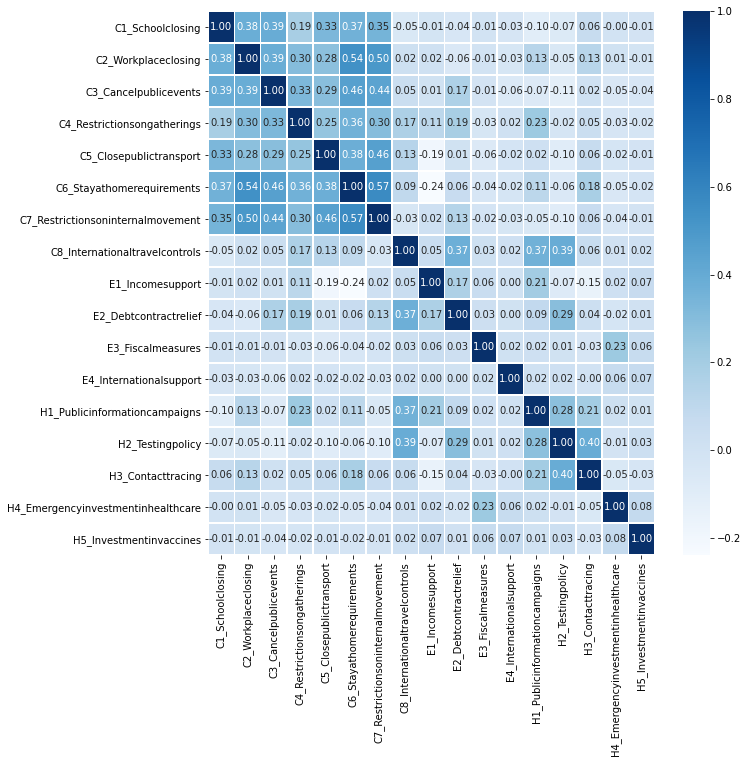

In [231]:
plt.figure(figsize=(10,10))
sns.heatmap(data = heatmap.corr(), annot=True, fmt = '.2f', linewidth=.5, cmap='white')